### Your name:

<pre> Siqi Liu </pre>

### Collaborators:

<pre> Enter the name of the people you worked with if any</pre>


In [1]:
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Seaborn
import seaborn as sns

### Classification - Based on Week 3

Q1. Build a classification model for the default of credit card clients dataset. More info here:
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

In week 3, you:
- Explored the dataset
- Built a full data pipeline
- Pre-processed data, explored features

Building on your work of week 3:
- Split dataset into 3 sets:
  - 70% -> Training and cross validation
  - 15% -> Model Stacking
  - 15% -> Testing
  

- Tune a decision tree classfier:
  - select a score (http://scikit-learn.org/stable/modules/model_evaluation.html). Explain your choice 
  - tune one parameter a time. Generate a plot for the score vs parameter values. Analyze your results.
    - criterion, max_depth, min_samples_split, min_samples_leaf, max_leaf_nodes=None    
  - tune all parameters at the same time using a randomgrid(http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV). First, run with a coarse grid, then refine in the next iteration. Use the information from the previous step to select parameter values.
  

In [2]:
### Your code here

## Feel free to use multiple cells

df = pd.read_excel("data/default_of_credit_card_clients.xls", 
                   skiprows= 1, header = 0)

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# Rename target column to DEFAULT
df = df.rename(columns = {"default payment next month" : "DEFAULT"})

In [5]:
# Rename PAY_0 to PAY_1
df = df.rename(columns = {"PAY_0" : "PAY_1"})

In [6]:
# Remove ID column
df = df.drop(columns = ["ID"])

In [7]:
# Rename SEX categories to M and F
df.loc[df['SEX'] == 1, 'SEX'] = 'M'
df.loc[df['SEX'] == 2, 'SEX'] = 'F'

In [8]:
# Rename EDUCATION categories, and group extra categories into Others
df.loc[df['EDUCATION'] == 1, 'EDUCATION'] = 'GradSchool'
df.loc[df['EDUCATION'] == 2, 'EDUCATION'] = 'University'
df.loc[df['EDUCATION'] == 3, 'EDUCATION'] = 'HighSchool'
df.loc[df['EDUCATION'] == 4, 'EDUCATION'] = 'Others'
df.loc[(df['EDUCATION'] == 0) | (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6), 'EDUCATION'] = 'Others'

In [9]:
#Rename MARRIAGE categories, and group extra categories into Others
df.loc[df['MARRIAGE'] == 1, 'MARRIAGE'] = 'Married'
df.loc[df['MARRIAGE'] == 2, 'MARRIAGE'] = 'Single'
df.loc[df['MARRIAGE'] == 3, 'MARRIAGE'] = 'Others'
df.loc[df['MARRIAGE'] == 0, 'MARRIAGE'] = 'Others'

# Train/Test Split

In [10]:
from sklearn.model_selection import train_test_split

tr, te = train_test_split(df, test_size=0.2, random_state=42)

tr = tr.copy()
te = te.copy()

In [11]:
tr_y = tr['DEFAULT'].copy()
tr_X = tr.drop('DEFAULT', axis = 1)

In [12]:
tr_y.head()

21753    0
251      0
22941    0
618      0
17090    0
Name: DEFAULT, dtype: int64

In [13]:
tr_X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
21753,80000,F,University,Single,24,0,0,0,0,0,...,78321,73731,39643,39457,3503,5001,2092,1218,1445,878
251,30000,M,University,Single,28,0,0,0,0,0,...,29155,25255,22001,0,5006,1244,851,955,0,0
22941,180000,F,Others,Married,44,0,0,-1,-1,-1,...,850,0,6881,10340,0,850,0,6881,10340,182
618,60000,M,GradSchool,Single,25,0,0,0,0,0,...,38533,39639,39619,39140,2018,1900,2000,1500,1900,2000
17090,130000,F,University,Single,25,0,0,0,0,0,...,114734,117823,120854,123904,4100,4200,5000,5000,5000,10700


In [14]:
te_y = te['DEFAULT'].copy()
te_X = te.drop('DEFAULT', axis = 1)

In [15]:
tr_y.sum() / tr_X.shape[0]

0.22179166666666666

In [16]:
te_y.sum() / te_X.shape[0]

0.21883333333333332

# Data Cleaning Pipeline

In [17]:
# From https://ramhiser.com/post/2018-04-16-building-scikit-learn-pipeline-with-pandas-dataframe/

from sklearn.base import BaseEstimator, TransformerMixin

class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        assert isinstance(X, pd.DataFrame)

        try:
            return X[self.columns]
        except KeyError:
            cols_error = list(set(self.columns) - set(X.columns))
            raise KeyError("The DataFrame does not include the columns: %s" % cols_error)

class ColumnExcluder(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        assert isinstance(X, pd.DataFrame)

        try:
            return X[set(X.columns) - set(self.columns)]
        except KeyError:
            cols_error = list(set(self.columns) - set(X.columns))
            raise KeyError("The DataFrame does not include the columns: %s" % cols_error)

class TypeSelector(BaseEstimator, TransformerMixin):
    def __init__(self, dtype):
        self.dtype = dtype
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        return X.select_dtypes(include=[self.dtype])

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [19]:
tr_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24000 entries, 21753 to 23654
Data columns (total 23 columns):
LIMIT_BAL    24000 non-null int64
SEX          24000 non-null object
EDUCATION    24000 non-null object
MARRIAGE     24000 non-null object
AGE          24000 non-null int64
PAY_1        24000 non-null int64
PAY_2        24000 non-null int64
PAY_3        24000 non-null int64
PAY_4        24000 non-null int64
PAY_5        24000 non-null int64
PAY_6        24000 non-null int64
BILL_AMT1    24000 non-null int64
BILL_AMT2    24000 non-null int64
BILL_AMT3    24000 non-null int64
BILL_AMT4    24000 non-null int64
BILL_AMT5    24000 non-null int64
BILL_AMT6    24000 non-null int64
PAY_AMT1     24000 non-null int64
PAY_AMT2     24000 non-null int64
PAY_AMT3     24000 non-null int64
PAY_AMT4     24000 non-null int64
PAY_AMT5     24000 non-null int64
PAY_AMT6     24000 non-null int64
dtypes: int64(20), object(3)
memory usage: 4.4+ MB


In [20]:
# For Trees, no need to transform numerical columns
preprocess_pipeline_tree = make_pipeline(
    FeatureUnion(transformer_list=[
        ("numeric_features", make_pipeline(
            # Select all non-categorical features
            ColumnSelector(columns =
                           ['AGE'] +
                           ['PAY_' + str(i) for i in range(1, 7)] +
                           ['LIMIT_BAL'] +
                           ['BILL_AMT' + str(i) for i in range(1, 7)] +
                           ['PAY_AMT' + str(i) for i in range(1, 7)])
        )),
        ("categorical_features", make_pipeline(
            # Select all categorical features
            ColumnSelector(columns = ['SEX', 'EDUCATION', 'MARRIAGE']),
            # One-Hot Encode
            OneHotEncoder()
        ))
    ])
)

In [21]:
# For Regression, need to transform numerical columns
preprocess_pipeline_reg = make_pipeline(
    FeatureUnion(transformer_list=[
        ("numeric_features_untouch", make_pipeline(
            ColumnSelector(columns = 
                           ['AGE'] +
                           ['PAY_' + str(i) for i in range(1, 7)])
        )),
        ("numeric_features_transform", make_pipeline(
            ColumnSelector(columns =
                           ['LIMIT_BAL'] +
                           ['BILL_AMT' + str(i) for i in range(1, 7)] +
                           ['PAY_AMT' + str(i) for i in range(1, 7)] ),
            # Standardize
            MinMaxScaler()
        )),
        ("categorical_features", make_pipeline(
            # Select all categorical features
            ColumnSelector(columns = ['SEX', 'EDUCATION', 'MARRIAGE']),
            # One-Hot Encode
            OneHotEncoder()
        ))
    ])
)

# Transform Train/Test Data

In [22]:
# Tree
preprocess_pipeline_tree.fit(tr_X)

tr_X_transformed_tree = preprocess_pipeline_tree.transform(tr_X)
te_X_transformed_tree = preprocess_pipeline_tree.transform(te_X)

In [23]:
tr_X_transformed_tree.shape

(24000, 29)

In [24]:
te_X_transformed_tree.shape

(6000, 29)

In [25]:
# Regression
preprocess_pipeline_reg.fit(tr_X)

tr_X_transformed_reg = preprocess_pipeline_reg.transform(tr_X)
te_X_transformed_reg = preprocess_pipeline_reg.transform(te_X)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [26]:
tr_X_transformed_reg.shape

(24000, 29)

In [27]:
te_X_transformed_reg.shape

(6000, 29)

In [28]:
final_features = ['AGE'] + ['PAY_' + str(i) for i in range(1, 7)] + ['LIMIT_BAL'] + ['BILL_AMT' + str(i) for i in range(1, 7)] + ['PAY_AMT' + str(i) for i in range(1, 7)] + ['F', 'M'] +  ['GradSchool', 'HighSchool', 'Others', 'University'] + ['Married', 'Others', 'Single']

In [29]:
len(final_features)

29

In [30]:
pd.DataFrame(tr_X_transformed_tree.toarray(), columns=final_features).describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
AGE,24000.0,35.494,9.235,21.0,28.00,34.0,42.00,79.0
PAY_1,24000.0,-0.017,1.126,-2.0,-1.00,0.0,0.00,8.0
PAY_2,24000.0,-0.131,1.198,-2.0,-1.00,0.0,0.00,8.0
PAY_3,24000.0,-0.168,1.192,-2.0,-1.00,0.0,0.00,8.0
PAY_4,24000.0,-0.220,1.168,-2.0,-1.00,0.0,0.00,8.0
PAY_5,24000.0,-0.265,1.133,-2.0,-1.00,0.0,0.00,8.0
PAY_6,24000.0,-0.289,1.152,-2.0,-1.00,0.0,0.00,8.0
LIMIT_BAL,24000.0,167226.653,129734.959,10000.0,50000.00,140000.0,240000.00,1000000.0
BILL_AMT1,24000.0,50927.468,73400.840,-165580.0,3537.00,22321.5,66377.00,964511.0
BILL_AMT2,24000.0,48914.770,70923.493,-69777.0,2989.75,21140.5,63035.25,983931.0


In [31]:
pd.DataFrame(tr_X_transformed_reg.toarray(), columns=final_features).describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
AGE,24000.0,35.494,9.235,21.0,28.000,34.000,42.000,79.0
PAY_1,24000.0,-0.017,1.126,-2.0,-1.000,0.000,0.000,8.0
PAY_2,24000.0,-0.131,1.198,-2.0,-1.000,0.000,0.000,8.0
PAY_3,24000.0,-0.168,1.192,-2.0,-1.000,0.000,0.000,8.0
PAY_4,24000.0,-0.220,1.168,-2.0,-1.000,0.000,0.000,8.0
PAY_5,24000.0,-0.265,1.133,-2.0,-1.000,0.000,0.000,8.0
PAY_6,24000.0,-0.289,1.152,-2.0,-1.000,0.000,0.000,8.0
LIMIT_BAL,24000.0,0.159,0.131,0.0,0.040,0.131,0.232,1.0
BILL_AMT1,24000.0,0.192,0.065,0.0,0.150,0.166,0.205,1.0
BILL_AMT2,24000.0,0.113,0.067,0.0,0.069,0.086,0.126,1.0


### Ensemble Learning

Make sure to read and understand the documentation for each classifier.

Remember to make your code modular; it will save you rewriting the same things multiple times and will help avoid copy paste errors.


  
- Tune the following classifiers:
  - Random forest classfier
  - Adaboost Tree classifier
  - Extra trees classifier
  - Gradient Boosted Tree classifier
  - Logistic Regression
  
- Analyze, compare, and interpret your results
- What ensemble yields the best result? Can you identify certain types of events that are classified better/worse from the type of algorithm?
- Is the feature importance consistent for all classifiers?

# Helper Functions

In [32]:
# Plot ROC curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])

In [33]:
# Plot feature importance

def plot_feature_importance(features, importances):
    temp = pd.DataFrame({'Feature' : features
                     ,'Feature Importance' : importances})
    temp = temp.sort_values(by='Feature Importance', ascending = False)

    plt.figure(figsize = (7,4))
    plt.title('Feature Importance', fontsize=16)
    s = sns.barplot(x='Feature', y='Feature Importance', data=temp)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show

# Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error

In [35]:
rfc = RandomForestClassifier(random_state = 42)

In [36]:
# GridSearch
param_grid_rfc = {'n_estimators' : [i for i in range (500,801,100)],
                 'max_features' : [i/10 for i in range (4, 7)],
                 'max_depth' : [i for i in range(8, 11)]}

rfc_grid_cv = GridSearchCV(rfc
                           ,param_grid_rfc
                           ,cv = 4
                           ,scoring = 'roc_auc'
                           ,n_jobs = -1
                           ,verbose = 2)

rfc_grid_cv.fit(tr_X_transformed_tree, tr_y)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 36.9min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [500, 600, 700, 800], 'max_features': [0.4, 0.5, 0.6], 'max_depth': [8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=2)

In [37]:
# Best parameters
rfc_grid_cv.best_params_

{'max_depth': 10, 'max_features': 0.6, 'n_estimators': 800}

In [38]:
# Final model
rfc_final = rfc_grid_cv.best_estimator_

In [39]:
# Fit the training set with the final model
tr_y_pred_rfc = rfc_final.predict(tr_X_transformed_tree)
tr_y_prob_rfc = rfc_final.predict_proba(tr_X_transformed_tree)

In [40]:
# Fit the test set with the final model
te_y_pred_rfc = rfc_final.predict(te_X_transformed_tree)
te_y_prob_rfc = rfc_final.predict_proba(te_X_transformed_tree)

In [41]:
# ROC AUC scores
print('ROC AUC - Train')
print(roc_auc_score(tr_y, tr_y_prob_rfc[:,1]))
print('ROC AUC - Test')
print(roc_auc_score(te_y, te_y_prob_rfc[:,1]))

ROC AUC - Train
0.8625641310788703
ROC AUC - Test
0.7793652648158581


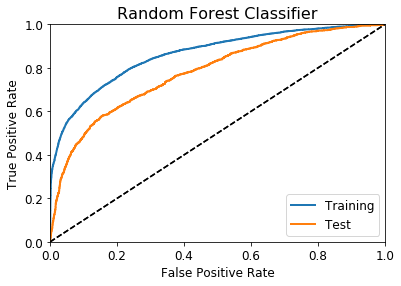

In [42]:
# ROC AUC curves
fpr_rfc_tr, tpr_rfc_tr, thresholds_rfc_tr = roc_curve(tr_y, tr_y_prob_rfc[:,1])
fpr_rfc_te, tpr_rfc_te, thresholds_rfc_te = roc_curve(te_y, te_y_prob_rfc[:,1])

plot_roc_curve(fpr_rfc_tr, tpr_rfc_tr, "Training")
plot_roc_curve(fpr_rfc_te, tpr_rfc_te, "Test")

plt.title('Random Forest Classifier', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.show()

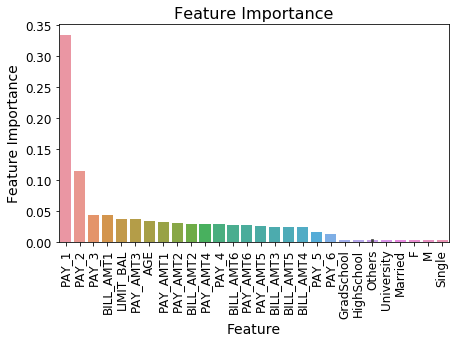

In [43]:
# Feature Importance
plot_feature_importance(final_features, rfc_final.feature_importances_)

# AdaBoost Classifier

In [44]:
from sklearn.ensemble import AdaBoostClassifier

In [45]:
abc = AdaBoostClassifier(random_state = 42)

In [46]:
# GridSearch
param_grid_abc = {'n_estimators' : [i for i in range (500,801,100)],
                 'learning_rate' : [0.01, 0.05, 0.1]}

abc_grid_cv = GridSearchCV(abc
                           ,param_grid_abc
                           ,cv = 4
                           ,scoring = 'roc_auc'
                           ,n_jobs = -1
                           ,verbose = 2)

abc_grid_cv.fit(tr_X_transformed_tree, tr_y)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  3.5min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=42),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [500, 600, 700, 800], 'learning_rate': [0.01, 0.05, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=2)

In [47]:
# Best parameters
abc_grid_cv.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [48]:
# Final model
abc_final = abc_grid_cv.best_estimator_

In [49]:
# Fit the training set with the final model
tr_y_pred_abc = abc_final.predict(tr_X_transformed_tree)
tr_y_prob_abc = abc_final.predict_proba(tr_X_transformed_tree)

In [50]:
# Fit the test set with the final model
te_y_pred_abc = abc_final.predict(te_X_transformed_tree)
te_y_prob_abc = abc_final.predict_proba(te_X_transformed_tree)

In [51]:
# ROC AUC scores
print('ROC AUC - Train')
print(roc_auc_score(tr_y, tr_y_prob_abc[:,1]))
print('ROC AUC - Test')
print(roc_auc_score(te_y, te_y_prob_abc[:,1]))

ROC AUC - Train
0.7885193166514635
ROC AUC - Test
0.7785969066454167


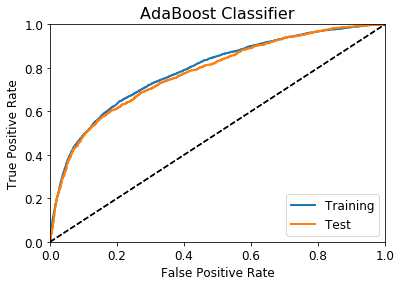

In [52]:
# ROC AUC curves
fpr_abc_tr, tpr_abc_tr, thresholds_abc_tr = roc_curve(tr_y, tr_y_prob_abc[:,1])
fpr_abc_te, tpr_abc_te, thresholds_abc_te = roc_curve(te_y, te_y_prob_abc[:,1])

plot_roc_curve(fpr_abc_tr, tpr_abc_tr, "Training")
plot_roc_curve(fpr_abc_te, tpr_abc_te, "Test")

plt.title('AdaBoost Classifier', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.show()

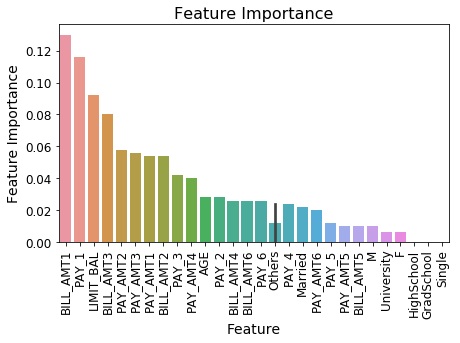

In [53]:
# Feature Importance
plot_feature_importance(final_features, abc_final.feature_importances_)

# Extra Trees Classifier

In [54]:
from sklearn.ensemble import ExtraTreesClassifier

In [55]:
etc = ExtraTreesClassifier(random_state = 42)

In [56]:
# GridSearch
param_grid_etc = {'n_estimators' : [i for i in range (500,801,100)],
                 'max_features' : [i/10 for i in range (4, 7)],
                 'max_depth' : [i for i in range(8, 11)]}

etc_grid_cv = GridSearchCV(etc
                           ,param_grid_etc
                           ,cv = 4
                           ,scoring = 'roc_auc'
                           ,n_jobs = -1
                           ,verbose = 2)

etc_grid_cv.fit(tr_X_transformed_tree, tr_y)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 24.5min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [500, 600, 700, 800], 'max_features': [0.4, 0.5, 0.6], 'max_depth': [8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=2)

In [57]:
# Best parameters
etc_grid_cv.best_params_

{'max_depth': 10, 'max_features': 0.6, 'n_estimators': 600}

In [58]:
# Final model
etc_final = etc_grid_cv.best_estimator_

In [59]:
# Fit the training set with the final model
tr_y_pred_etc = etc_final.predict(tr_X_transformed_tree)
tr_y_prob_etc = etc_final.predict_proba(tr_X_transformed_tree)

In [60]:
# Fit the test set with the final model
te_y_pred_etc = etc_final.predict(te_X_transformed_tree)
te_y_prob_etc = etc_final.predict_proba(te_X_transformed_tree)

In [61]:
# ROC AUC scores
print('ROC AUC - Train')
print(roc_auc_score(tr_y, tr_y_prob_etc[:,1]))
print('ROC AUC - Test')
print(roc_auc_score(te_y, te_y_prob_etc[:,1]))

ROC AUC - Train
0.8249220855314546
ROC AUC - Test
0.77251609554778


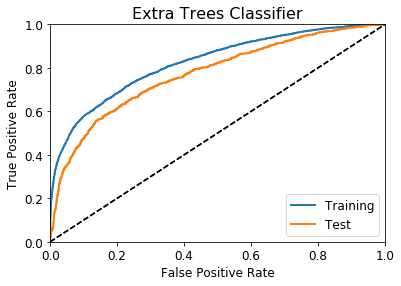

In [62]:
# ROC AUC curves
fpr_etc_tr, tpr_etc_tr, thresholds_etc_tr = roc_curve(tr_y, tr_y_prob_etc[:,1])
fpr_etc_te, tpr_etc_te, thresholds_etc_te = roc_curve(te_y, te_y_prob_etc[:,1])

plot_roc_curve(fpr_etc_tr, tpr_etc_tr, "Training")
plot_roc_curve(fpr_etc_te, tpr_etc_te, "Test")

plt.title('Extra Trees Classifier', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.show()

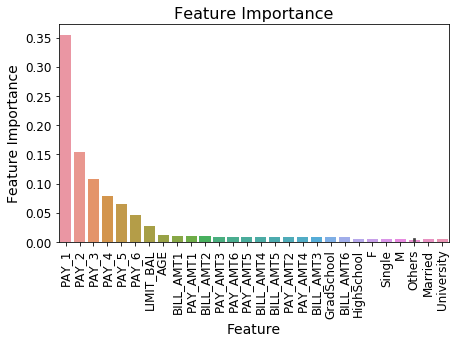

In [63]:
# Feature Importance
plot_feature_importance(final_features, etc_final.feature_importances_)

# Gradient Boosting Classifier (XGBoost)

In [64]:
import xgboost as xgb

In [65]:
xgbc = xgb.XGBClassifier(random_state = 42)

In [71]:
# GridSearch
param_grid_xgbc = {'learning_rate' : [0.01, 0.05, 0.1],
                 'max_depth' : [i for i in range(4, 7)],
                 'subsample' : [i/10 for i in range(4, 9)],
                 'n_estimators' : [600]}

xgbc_grid_cv = GridSearchCV(xgbc
                           ,param_grid_xgbc
                           ,cv = 4
                           ,scoring = 'roc_auc'
                           ,n_jobs = -1
                           ,verbose = 2)

xgbc_grid_cv.fit(tr_X_transformed_tree, tr_y)

Fitting 4 folds for each of 45 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 12.2min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [4, 5, 6], 'subsample': [0.4, 0.5, 0.6, 0.7, 0.8], 'n_estimators': [600]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=2)

In [72]:
# Best parameters
xgbc_grid_cv.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 600, 'subsample': 0.5}

In [74]:
# Final model
xgbc_final = xgbc_grid_cv.best_estimator_

In [75]:
# Fit the training set with the final model
tr_y_pred_xgbc = xgbc_final.predict(tr_X_transformed_tree)
tr_y_prob_xgbc = xgbc_final.predict_proba(tr_X_transformed_tree)

In [76]:
# Fit the test set with the final model
te_y_pred_xgbc = xgbc_final.predict(te_X_transformed_tree)
te_y_prob_xgbc = xgbc_final.predict_proba(te_X_transformed_tree)

In [77]:
# ROC AUC scores
print('ROC AUC - Train')
print(roc_auc_score(tr_y, tr_y_prob_xgbc[:,1]))
print('ROC AUC - Test')
print(roc_auc_score(te_y, te_y_prob_xgbc[:,1]))

ROC AUC - Train
0.8348009429832652
ROC AUC - Test
0.7835764070736725


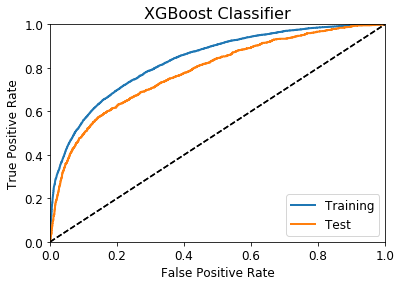

In [78]:
# ROC AUC curves
fpr_xgbc_tr, tpr_xgbc_tr, thresholds_xgbc_tr = roc_curve(tr_y, tr_y_prob_xgbc[:,1])
fpr_xgbc_te, tpr_xgbc_te, thresholds_xgbc_te = roc_curve(te_y, te_y_prob_xgbc[:,1])

plot_roc_curve(fpr_xgbc_tr, tpr_xgbc_tr, "Training")
plot_roc_curve(fpr_xgbc_te, tpr_xgbc_te, "Test")

plt.title('XGBoost Classifier', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.show()

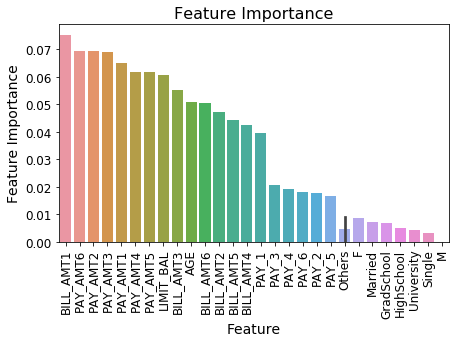

In [79]:
# Feature Importance
plot_feature_importance(final_features, xgbc_final.feature_importances_)

# Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
lr = LogisticRegression(random_state = 42)

In [152]:
# GridSearch
param_grid_lr = {'penalty' : ['l1','l2'],
                 'C' : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3] + list(np.logspace(0,4,10))}

lr_grid_cv = GridSearchCV(lr
                           ,param_grid_lr
                           ,cv = 4
                           ,scoring = 'roc_auc'
                           ,refit = True
                           ,n_jobs = -1
                           ,verbose = 2)

lr_grid_cv.fit(tr_X_transformed_tree, tr_y)

Fitting 4 folds for each of 32 candidates, totalling 128 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:   29.1s finished
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 1.0, 2.7825594022071245, 7.742636826811269, 21.544346900318832, 59.94842503189409, 166.81005372000593, 464.15888336127773, 1291.5496650148827, 3593.813663804626, 10000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=2)

In [153]:
# Best parameters
lr_grid_cv.best_params_

{'C': 0.3, 'penalty': 'l1'}

In [154]:
# Final model
lr_final = lr_grid_cv.best_estimator_

In [155]:
# Fit the training set with the final model
tr_y_pred_lr = lr_final.predict(tr_X_transformed_reg)
tr_y_prob_lr = lr_final.predict_proba(tr_X_transformed_reg)

In [156]:
# Fit the test set with the final model
te_y_pred_lr = lr_final.predict(te_X_transformed_reg)
te_y_prob_lr = lr_final.predict_proba(te_X_transformed_reg)

In [157]:
# ROC AUC scores
print('ROC AUC - Train')
print(roc_auc_score(tr_y, tr_y_prob_lr[:,1]))
print('ROC AUC - Test')
print(roc_auc_score(te_y, te_y_prob_lr[:,1]))

ROC AUC - Train
0.7046739004779141
ROC AUC - Test
0.706410156204933


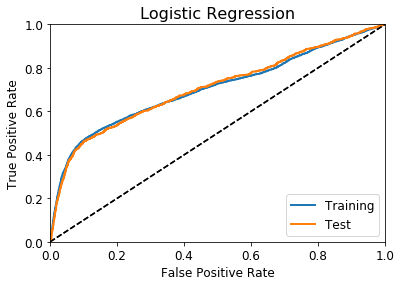

In [158]:
# ROC AUC curves
fpr_lr_tr, tpr_lr_tr, thresholds_lr_tr = roc_curve(tr_y, tr_y_prob_lr[:,1])
fpr_lr_te, tpr_lr_te, thresholds_lr_te = roc_curve(te_y, te_y_prob_lr[:,1])

plot_roc_curve(fpr_lr_tr, tpr_lr_tr, "Training")
plot_roc_curve(fpr_lr_te, tpr_lr_te, "Test")

plt.title('Logistic Regression', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.show()

# Questions

What ensemble yields the best result?

<pre> The XGBoost classifier yielded the best result in terms of ROC AUC scores on the test set. </pre>

Is the feature importance consistent for all classifiers?

<pre> The feature importances are not consistent across all classifiers. AdaBoost and XGBoost had similar importance rankings, while Random Forest and Extra Trees have similar importance rankings. </pre>


- Stack your models. 
  - Combine the models from the previous section using the stacking approach: 
    - Choose the model use to combine. Examples are:
      - Linear Regression
      - Logistic Regression

# Stacking Ensemble

In [159]:
# All the estimators
named_estimators = [("random_forest_clf", rfc_final),
                   ("adaboost_clf", abc_final),
                   ("extra_trees_clf", etc_final),
                   ("xgboost_clf", xgbc_final),
                   ("log_reg", lr_final)]

In [160]:
# Create a matrix that holds all of the prediction probabilities for the training set
tr_y_prob_all = np.empty((len(tr_y), len(named_estimators)), dtype=np.float32)

In [161]:
# Fill in the predictions for the training set
for i, (name, est) in enumerate(named_estimators):
    if name == "log_reg":
        tr_y_prob_all[:, i] = est.predict_proba(tr_X_transformed_reg)[:,1]
    else:
        tr_y_prob_all[:, i] = est.predict_proba(tr_X_transformed_tree)[:,1]

In [162]:
tr_y_prob_all

array([[0.09157121, 0.4898722 , 0.11544751, 0.10266627, 0.22497164],
       [0.16086584, 0.49064296, 0.16207308, 0.13931262, 0.25102267],
       [0.11279295, 0.48727182, 0.09040434, 0.08068711, 0.12244322],
       ...,
       [0.24106304, 0.4952387 , 0.14796098, 0.21341893, 0.06605121],
       [0.26401195, 0.49290544, 0.20191689, 0.23457278, 0.23735082],
       [0.17012475, 0.49143276, 0.14355579, 0.12702197, 0.06989754]],
      dtype=float32)

In [163]:
# Create a matrix that holds all of the prediction probabilities for the test set
te_y_prob_all = np.empty((len(te_y), len(named_estimators)), dtype=np.float32)

In [164]:
# Fill in the predictions for the test set
for i, (name, est) in enumerate(named_estimators):
    if name == "log_reg":
        te_y_prob_all[:, i] = est.predict_proba(te_X_transformed_reg)[:,1]
    else:
        te_y_prob_all[:, i] = est.predict_proba(te_X_transformed_tree)[:,1]

In [165]:
te_y_prob_all

array([[0.15227133, 0.49129048, 0.16929814, 0.17676124, 0.24755402],
       [0.08689722, 0.4887025 , 0.07642807, 0.08467972, 0.2382078 ],
       [0.14557034, 0.4903429 , 0.11791239, 0.13294466, 0.2603272 ],
       ...,
       [0.12989268, 0.4920229 , 0.16996482, 0.1512287 , 0.2801577 ],
       [0.15845214, 0.49524507, 0.1672761 , 0.15667196, 0.31071308],
       [0.14822064, 0.48900414, 0.17402339, 0.10372309, 0.31494886]],
      dtype=float32)

## Stacking - Logistic Regression

In [166]:
lr_blender = LogisticRegression(random_state = 42)

In [168]:
# GridSearch
param_grid_lr_blender = {'penalty' : ['l1','l2'],
                 'C' : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3] + list(np.logspace(0,4,10))}

lr_blender_grid_cv = GridSearchCV(lr_blender
                           ,param_grid_lr_blender
                           ,cv = 4
                           ,scoring = 'roc_auc'
                           ,n_jobs = -1
                           ,verbose = 2)

lr_blender_grid_cv.fit(tr_y_prob_all, tr_y)

Fitting 4 folds for each of 32 candidates, totalling 128 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of 128 | elapsed:    5.2s remaining:    8.7s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:  1.5min finished
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 1.0, 2.7825594022071245, 7.742636826811269, 21.544346900318832, 59.94842503189409, 166.81005372000593, 464.15888336127773, 1291.5496650148827, 3593.813663804626, 10000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=2)

In [169]:
# Best parameters
lr_blender_grid_cv.best_params_

{'C': 2.7825594022071245, 'penalty': 'l2'}

In [171]:
# Final model
lr_blender_final = lr_blender_grid_cv.best_estimator_

In [172]:
# Fit the training set with the final model
tr_y_pred_lr_blender = lr_blender_final.predict(tr_y_prob_all)
tr_y_prob_lr_blender = lr_blender_final.predict_proba(tr_y_prob_all)

In [173]:
# Fit the test set with the final model
te_y_pred_lr_blender = lr_blender_final.predict(te_y_prob_all)
te_y_prob_lr_blender = lr_blender_final.predict_proba(te_y_prob_all)

In [174]:
# ROC AUC scores
print('ROC AUC - Train')
print(roc_auc_score(tr_y, tr_y_prob_lr_blender[:,1]))
print('ROC AUC - Test')
print(roc_auc_score(te_y, te_y_prob_lr_blender[:,1]))

ROC AUC - Train
0.8832320161674276
ROC AUC - Test
0.731441554324312


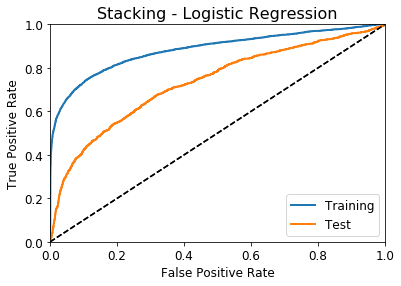

In [175]:
# ROC AUC curves
fpr_lr_blender_tr, tpr_lr_blender_tr, thresholds_lr_blender_tr = roc_curve(tr_y, tr_y_prob_lr_blender[:,1])
fpr_lr_blender_te, tpr_lr_blender_te, thresholds_lr_blender_te = roc_curve(te_y, te_y_prob_lr_blender[:,1])

plot_roc_curve(fpr_lr_blender_tr, tpr_lr_blender_tr, "Training")
plot_roc_curve(fpr_lr_blender_te, tpr_lr_blender_te, "Test")

plt.title('Stacking - Logistic Regression', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.show()

## Stacking - XGBoost Classifier

In [177]:
xgbc_blender = xgb.XGBClassifier(random_state = 42)

In [195]:
# GridSearch
param_grid_xgbc_blender = {'learning_rate' : [0.1, 0.2],
                         'max_depth' : [i for i in range(5, 7)],
                         'subsample' : [i/10 for i in range(5, 9)],
                         'n_estimators' : [600]}

xgbc_blender_grid_cv = GridSearchCV(xgbc_blender
                           ,param_grid_xgbc_blender
                           ,cv = 4
                           ,scoring = 'roc_auc'
                           ,n_jobs = -1
                           ,verbose = 2)

xgbc_blender_grid_cv.fit(tr_y_prob_all, tr_y)

Fitting 4 folds for each of 16 candidates, totalling 64 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   41.5s
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:  1.4min finished


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [5, 6], 'subsample': [0.5, 0.6, 0.7, 0.8], 'n_estimators': [600]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=2)

In [196]:
# Best parameters
xgbc_blender_grid_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 600, 'subsample': 0.8}

In [197]:
# Final model
xgbc_blender_final = xgbc_blender_grid_cv.best_estimator_

In [198]:
# Fit the training set with the final model
tr_y_pred_xgbc_blender = xgbc_blender_final.predict(tr_y_prob_all)
tr_y_prob_xgbc_blender = xgbc_blender_final.predict_proba(tr_y_prob_all)

In [199]:
# Fit the test set with the final model
te_y_pred_xgbc_blender = xgbc_blender_final.predict(te_y_prob_all)
te_y_prob_xgbc_blender = xgbc_blender_final.predict_proba(te_y_prob_all)

In [200]:
# ROC AUC scores
print('ROC AUC - Train')
print(roc_auc_score(tr_y, tr_y_prob_xgbc_blender[:,1]))
print('ROC AUC - Test')
print(roc_auc_score(te_y, te_y_prob_xgbc_blender[:,1]))

ROC AUC - Train
0.988081369357365
ROC AUC - Test
0.6955952935563698


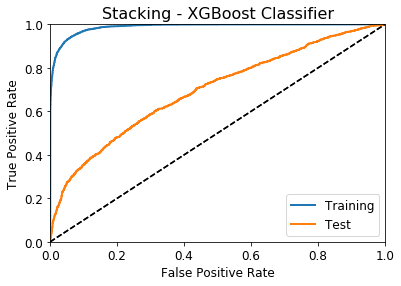

In [201]:
# ROC AUC curves
fpr_xgbc_blender_tr, tpr_xgbc_blender_tr, thresholds_xgbc_blender_tr = roc_curve(tr_y, tr_y_prob_xgbc_blender[:,1])
fpr_xgbc_blender_te, tpr_xgbc_blender_te, thresholds_xgbc_blender_te = roc_curve(te_y, te_y_prob_xgbc_blender[:,1])

plot_roc_curve(fpr_xgbc_blender_tr, tpr_xgbc_blender_tr, "Training")
plot_roc_curve(fpr_xgbc_blender_te, tpr_xgbc_blender_te, "Test")

plt.title('Stacking - XGBoost Classifier', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.show()

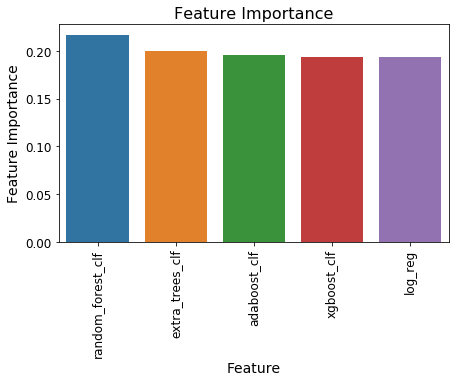

In [202]:
# Feature Importance
plot_feature_importance([name for i, (name, est) in enumerate(named_estimators)], xgbc_blender_final.feature_importances_)

#### Conclusions?

Explain your results and choices

- Stacking using Logistic Regression does not improve the performance compared to just using the XGBoost Classifier
- Stacking using XGBoost also does not improve the performance. It is severely overfitting

Q. (Optional) If a Decision Tree is overfitting the training set, is it a good idea to try decreasing max_depth?

Yes

Q. (Optional) If a Decision Tree is underfitting the training set, is it a good idea to try scaling the input features?

Scaling should not affect the training effectiveness. Instead, try to increase `max_depth` or get more data.

Q. (Optional) What is the difference between hard and soft voting classifiers?

Hard-voting looks only at the predicted value (i.e. 0 or 1) in the estimators and selects the majority value, while soft-voting looks at the predicted proabilities (i.e. from 0 to 1) and calcuates the average probabilities and determines the value based on that

Q. (Optional) If your AdaBoost ensemble underfits the training data, what hyperparameters should you tweak and how?

I would increase `n_estimators` and decrease the `learning_rate`

Q. (Optional) If your Gradient Boosting ensemble overfits the training set, should you increase or decrease the learning rate?

Increase

### Conclusions


An individual XGBoost model is the best option

### Submit your notebook

Submit your solution here
https://goo.gl/forms/VKD7Zwu54oHjutDc2
Make sure you rename your notebook to    
W3_UTORid.ipynb    
Example W3_adfasd01.ipynb
